## Summer 2022 Data Science Intern Challenge - Question 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Having a look at summary of data we can see there is a maximum order amount of 704000 and a maximum total item of 2000. This is far from the 50th precentile and the 75th percentile. The mean of order amount and total items is also greater than the 75th percentile. This will sugest the data is highly skewed. This probably means someone is buying in bulk or the is an error in the way the data for obtained. In this case we are interested in how much individuals spend per order an not wholesale buyers.

<AxesSubplot:>

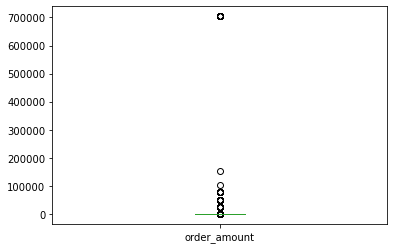

In [4]:
df['order_amount'].plot(kind='box')

<AxesSubplot:>

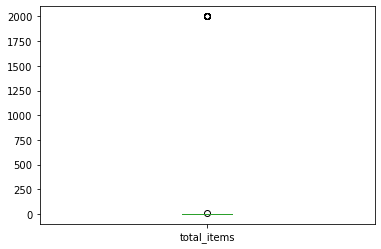

In [5]:
df['total_items'].plot(kind='box')

Looking at a box plots above we can see we have a number of outliers.

A better way to evaluate to data will be to remove data sets that appear to be unrealic. Clean the data and recalculate the AOV. I sugest trimming the data.

In [6]:
new_df = df[df['order_amount'] < np.percentile(df['order_amount'], 98.5)]
new_df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [7]:
new_df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000
mean,2499.283858,49.847716,849.795533,300.524061,1.987817
std,1444.575184,29.079004,86.841713,155.058781,0.971284
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1246.000000,24.000000,776.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3752.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,948.000000,6.000000


In [8]:
AOV = new_df['order_amount'].mean()
print("The AOV is: ", AOV)

The AOV is:  300.52406091370557
